### Expectation Maximization (EM) Algorithm


This notebook is the supplimentary material about EM algorithm written by Linda for RC purpose if there is enough time. Or you can just self-study this algorithm.

In [1]:
### Set up the note book
import numpy as np
import pandas as pd 
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

# Example 1
In a genetic linkage experiment, 197 animals are randomly assigned to four categories according to the multinomial distribution with cell probabilities $\pi_1=\frac{1}{2}+\frac{\theta}{4}, \pi_2=\frac{1-\theta}{4}, \pi_3=\frac{1-\theta}{4}$, and $\pi_4=\frac{\theta}{4}$. The corresponding observations are $y=\left(y_1, y_2, y_3, y_4\right)=(125,18,20,34)$.\
Please find the most suitable $\theta$

In [2]:
y = [125,18,20,34]
def safe_log(x):
    return np.log(x+1e-8)

Actually, in the first place we will think of the maximum liklihood estimation for this problem. The following code is about maximum liklihood.

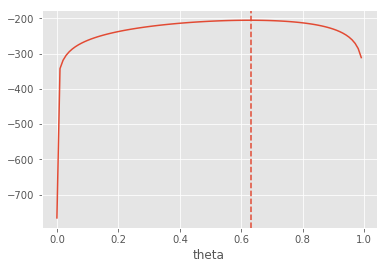

In [3]:
## Visuallize the log-likelihood
x = np.arange(0,1.0,0.01) 
log_liklihood = y[0]*safe_log(0.5+x/4)+(y[1]+y[2])*safe_log(0.25-x/4)+y[3]*safe_log(x/4)
plt.plot(x,log_liklihood)
plt.axvline(0.63,linestyle='--')
plt.xlabel('theta')
plt.show()

It seems that when $\theta = 0.63$ it is best

The method of EM Algorithm is used to deal with missing data problem, for example, you only know the sum of the two variable but do not know each of them.
EM iterates between two steps:
1. Minorization (E-step): Find $L\left(\theta, F^{(t)}\right)$ by calculating the expectation of the complete log-likelihood
$$
\mathbb{E}_{F^{(t)}}\left[\log \mathbb{P}\left(Y_{\text {miss }}, Y_{o b s} \mid \theta\right)\right]=Q\left(\theta \mid \theta^{(t)}\right) .
$$
Note that $L\left(\theta, F^{(t)}\right)=Q\left(\theta \mid \theta^{(t)}\right)+H\left(F^{(t)}\right)$, where $H\left(F^{(t)}\right)$ is a constant w.r.t $\theta$ and thus can be omitted.
2. Maximization (M-step): $\max _\theta L\left(\theta, F^{(t)}\right) \Leftrightarrow \max _\theta Q\left(\theta \mid \theta^{(t)}\right)$ to obtain $\theta^{(t+1)}$.

Then, let's talk about the EM Algorithm.\
We can treat this as a missing data problem to use EM algorithm to numerically solve it.\
Split the first category $\pi_1=\pi_{11}+\pi_{12}, \pi_{11}=\frac{1}{2}, \pi_{12}=\frac{\theta}{4}$. Therefore, the complete data is $y_{c m p}=\left(y_{11}, y_{12}, y_2, y_3, y_4\right)$. The complete data log-likelihood is:
$$
\begin{aligned}
\ell(\theta \mid y) & =y_{11} \log \frac{1}{2}+\left(y_{12}+y_4\right) \log \frac{\theta}{4}+\left(y_2+y_3\right) \log \frac{1-\theta}{4} \\
& =\left(y_{12}+y_4\right) \log \theta+\left(y_2+y_3\right) \log (1-\theta)+\text { constant. }
\end{aligned}
$$
EM algorithm:
- E-step: Calculate
$$
\mathbb{E}\left(y_{12} \mid y, \theta^{(t)}\right)=y_1 \frac{\theta^{(t)} / 4}{1 / 2+\theta^{(t)} / 4}:=y_{12}^{(t)} .
$$
Then
$$
\begin{aligned}
Q\left(\theta \mid \theta^{(t)}\right)=\mathbb{E}\left[\ell(\theta \mid X) \mid y, \theta^{(t)}\right]=\left(y_{12}^{(t)}\right. & \left.+y_4\right) \log \theta+\left(y_2+y_3\right) \log (1-\theta) \\
& + \text { constant. }
\end{aligned}
$$
- M-step: Maximizing $Q\left(\theta \mid \theta^{(t)}\right)$ (binomial log-likelihood),
$$
\theta^{(t+1)}=\frac{y_{12}^{(t)}+y_4}{y_{12}^{(t)}+y_4+y_2+y_3}
$$

In [4]:
##EM Code
num_iter = 100
theta = 0.1
for i in tqdm(range(num_iter)):
    E_comp = y[0]*theta/4/(0.5+theta/4)
    theta = (E_comp + y[3])/(E_comp+y[3]+y[2]+y[1])
    if i%10 ==0:
        print('step '+str(i), str(theta))


100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]

step 0 0.5125229077580941
step 10 0.6268214976553711
step 20 0.6268214978709824
step 30 0.6268214978709824
step 40 0.6268214978709824
step 50 0.6268214978709824
step 60 0.6268214978709824
step 70 0.6268214978709824
step 80 0.6268214978709824
step 90 0.6268214978709824


You find it works!

Student A:" Why you use so complecatied EM algorithm in such a simple problem. I can solve it by method of Maximum Likelihood, do statistician only want to show off their skills?"
Answer: " Of course not! Let's look at the following example."

# Example 2
I have 2 coin A,B, whose head probability is $\theta_A,\theta_B$ Filp 5 times the result is \
y=((5,5),(9,1),(8,2),(4,6),(7,3)) find $\theta_A,\theta_B$

Every iteration must cover all the data set. The total log-likelihood must be the weighted sum of llA and llB. Since every time the coin flipping result follows a binomial distribution. Thus,\
E-step:\
$llA_i = y_i(0)log(\theta_A)+ y_i(1)log(1-\theta_A)$\
$llB_i = y_i(0)log(\theta_B)+ y_i(1)log(1-\theta_B)$\
$ll_{total_i} = w_{A_i}llA_i+w_{B_i}llB_i$\
$w_{A_i} = exp(ll_{A_i})/(exp(ll_{A_i})+exp(ll_{B_i}),w_{A_i}=1-w_{B_i}$\
$ll_{total} = \sum_{i=1}^5*ll_{total_i}$
M-step:\
Find the partial derivative of $ll_{total}$ respect to $\theta_A, \theta_B$\
To get $\theta_A^{(t+1),} \theta_B^{(t+1)}$

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 3269.93it/s]

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 11
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 21
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 31
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 41
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 51
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 61
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 71
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 81
theta_A = 0.80, theta_B = 0.52, ll = -29.87
Iteration: 91
theta_A = 0.80, theta_B = 0.52, ll = -29.87


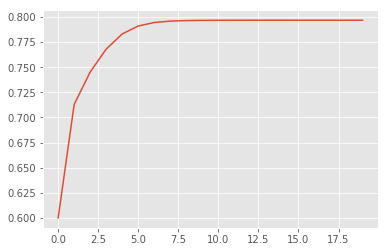

In [8]:
y = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = [0.6,0.5]
x_ax = []
y_ax = []


for i in tqdm(range(num_iter)):
    ws_A = []
    ws_B = []
    vs_A = []
    vs_B = []
    ll_total = 0
    x_ax.append(i)
    y_ax.append(thetas[0])
    for x in y:
        llA = x[0]*np.log(thetas[0]) + x[1]*np.log(1-thetas[0])
        llB = x[0]*np.log(thetas[1]) + x[1]*np.log(1-thetas[1])
        #print(llA,llB)
        w_A = np.exp(llA)/(np.exp(llA) + np.exp(llB))
        w_B = np.exp(llB)/(np.exp(llA) + np.exp(llB))
        
        ws_A.append(w_A)
        ws_B.append(w_B)
        
        vs_A.append(np.dot(w_A, x))
        vs_B.append(np.dot(w_B, x))
        
        ll_total +=  w_A*llA + w_B*llB
    #print(ll_total)
    #print(vs_A)
    thetas[0] = (np.sum(vs_A, 0)/np.sum(vs_A))[0]
    thetas[1] = (np.sum(vs_B, 0)/np.sum(vs_B))[0]
    if i%10 ==0:
        print ("Iteration: %d" % (i+1))
        print ("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0], thetas[1], ll_total))
plt.plot(np.array(x_ax)[:20],np.array(y_ax)[:20])
#     print ("Iteration: %d" % (i+1))
#     print ("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_total))

You can see this algorithm converges